# Select Genre of Next Movie
### by Wenzhe Ding

In this project, our goal was to pick the genre of our studio’s next movie using the dataset of IMDB movie ratings assuming we are the decision makers. We first conducted descriptive data analysis on the given dataset, and our analysis are driven by questions below:
* Are there any trends of number of movies in each genre?
* What is the percentage of high-rating movies in each genre?
* Are there relationships between movie length and rating?

Afterwards, we came up with two metrics to evaluate the popularity and reputation of a movie in a cerain genre. We concluded with recommendation based on the rankings of these two metrics and limitations of our analysis.

## Table of contents
- [Data Source](#Data Source)
- [Descriptive Data Analysis](#Descriptive Data Analysis)
   - [Statistics](#stats)

In [ ]:

[[ go back to the top ]](#Table-of-contents)

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("movies_data.csv")

In [242]:
df.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [12]:
genre = df.iloc[:,-7:].columns.tolist()
print genre

['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']


There are 7 genres in the dataset.

In [244]:
print sorted(df.year.unique())

[1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005]


The time of movie ranges from 1893 to 2005, which means this dataset is not recent and we could not get any information after 2005.

In [245]:
print len(df)
print len(df.loc[df.budget > 0])
print len(df.loc[df.mpaa > 0])

58788
5183
4924


Since there are over 90% missing values of column "budget" and "mpaa", we excluded these two features for further analysis. We are interested in the distribution of movie rating, length, and number of votes of each movie.

# Descriptive Data Analysis
[[ go back to the top ]](#Table-of-contents)

### Distribution of movie rating, length, and votes

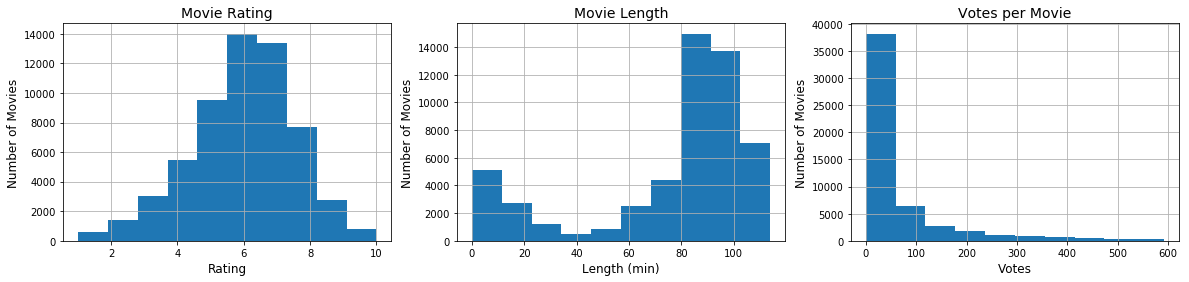

In [246]:
plt.figure(1,figsize=(20,4))
plt.subplot(131)
df.rating.hist()
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Movie Rating', fontsize=14)

plt.subplot(132)
df.length.hist(range=[0,df.length.quantile(.9)])
plt.xlabel('Length (min)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Movie Length', fontsize=14)

plt.subplot(133)
df.votes.hist(range=[0,df.votes.quantile(.9)])
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Votes per Movie', fontsize=14)

The above graph shows that the majority movies have rating between 6 to 7, have length between 80 to 100 minutes, and got less than 50 votes. Interestingly, the patterns of the distribution of each feature varies widely. Movie rating seems to fall along a bell-shaped distribution, while movie length is left-skewed, with the mass of the distribution is concentrated on the right of the figure. In comparision, votes per movie is right-skewed, with a minority of movies have more than 50 votes.

### Distribution of movie rating and votes in each genre

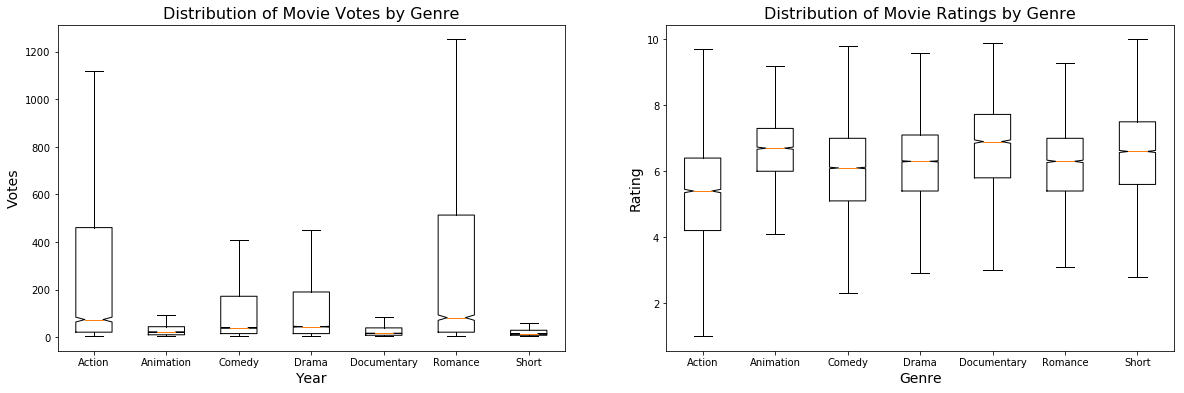

In [271]:
vote_plot = []
genre_plot = []
for g in genre:
    vote_plot.append([df.loc[df[g] == 1]['votes']])
    genre_plot.append([df.loc[df[g] == 1]['rating']])

plt.figure(1,figsize=(20,6))
plt.subplot(121)
plt.boxplot(vote_plot,labels=genre,notch=1, sym='', whis=1.5)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Votes', fontsize=14)
plt.title('Distribution of Movie Votes by Genre', fontsize=16)

plt.subplot(122)
plt.boxplot(genre_plot,labels=genre,notch=1, sym='', whis=1.5)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Distribution of Movie Ratings by Genre', fontsize=16)

The graph on the left demostrates that the range of votes of action and romance movies are widest among all movies, and the median of number of votes per motive is highest in action and romance movies. However, action movies have lowest median value of ratings. The graph on the right also shows that animation and documentary movies have highest median of rating.

### Number of movies in each genre

In order to discover the trend of number of movies in each genre, we used two plots to show the change of movie volume with difference genres by year.

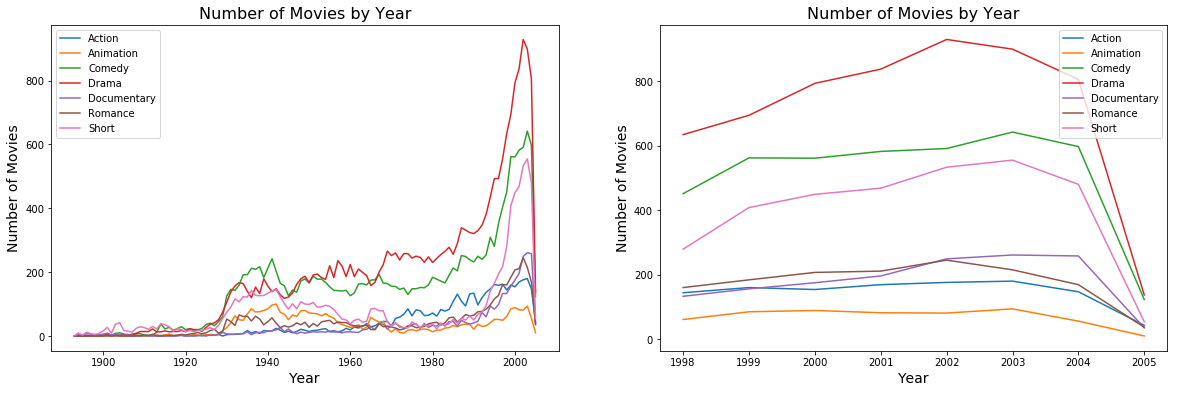

In [27]:
year = df.groupby('year').sum().iloc[:,-7:]
plt.figure(1,figsize=(20,6))

plt.subplot(121)
for g in genre:
    plt.plot(year[g],label = g)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies by Year', fontsize=16)
plt.legend()

plt.subplot(122)
for g in genre:
    plt.plot(year[105:][g],label = g)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies by Year', fontsize=16)
plt.legend()

The general trend of movie volume is shown on the left graph, while the right graph examines the number of movies in more recent years a little closer. We found that there was an increasing trend of number of movies on the market from late 20th century to early 21st century, while movies in all genres decreases from 2003 despite the difference in magnitude. There was also a sharp decrease of movie production starting from 2004. This could due to the incomplete records in 2005 in our dataset. Note that the largest number of movies are drama while the least number of movies are animiation since year 2000. 

### 2. percentage of movies with rating higher than 7 in each genre

Based on the analysis above, we discovered that the majority of movies have rating less than or equal to 7. We are interested the percentage of high-rating movies - defined as movies with rating higher than 7 - in each genre.

In [45]:
higher = df.loc[df.rating > 7].groupby('year').sum().iloc[:,-7:]
plt.figure(1,figsize=(20,6))
higher.iloc[95:]

,Action,Animation,Comedy,Drama,Documentary,Romance,Short
year,,,,,,,
1999,13,16,67,125,49,23,82
2000,22,25,115,185,94,53,169
2001,30,34,125,228,100,42,188
2002,37,33,149,292,140,57,249
2003,39,43,187,297,156,46,260
2004,37,26,224,332,168,54,326
2005,12,3,37,51,21,11,49


The above table is the number of high-rating movies in each genre, and the table below represents the number of total movies in each genre. Both of them focus on the most recent 7 years of data. Divide the first table by the second table, we are able to obtain the percetage of high-rating movies in each genre.

In [46]:
year.iloc[106:]

,Action,Animation,Comedy,Drama,Documentary,Romance,Short
year,,,,,,,
1999,160,85,562,694,156,184,408
2000,154,89,561,793,175,207,449
2001,169,82,582,837,196,211,468
2002,176,81,591,929,249,245,533
2003,180,94,642,899,261,215,555
2004,147,56,597,805,258,169,480
2005,43,10,123,137,35,37,54


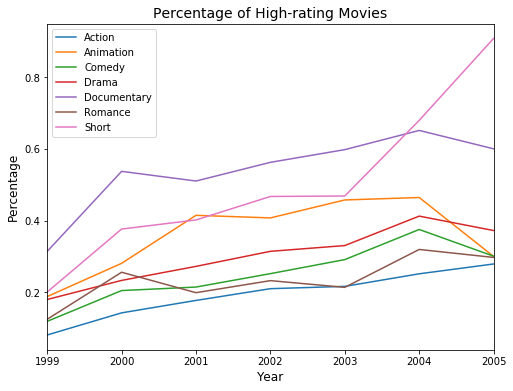

In [48]:
perc = higher.iloc[95:].divide(year.iloc[106:],axis="index")
perc.plot(figsize=(8,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of High-rating Movies', fontsize=14)

The figure above shows the percentage of high-rating movies: short movies has highest proportion of high-rating movies while action movies has the least in 2005.

### 3. relationships between length and rating

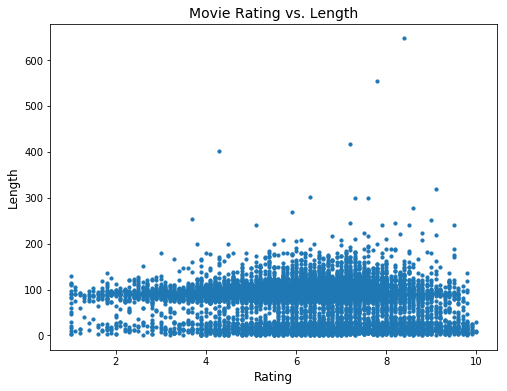

In [36]:
recent = df.loc[df.year > 1998]
fig, ax = plt.subplots()
recent.plot(ax=ax, kind='scatter', x='rating', y='length', s = 10,figsize=(8,6))
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.title('Movie Rating vs. Length', fontsize=14)

We are also interested in discovering relationships between movie length and rating. The scatter plot above shows that there is no clear correlation between the two. High-rating movies ranges from short movies with less than ten minues to long movies with long than 100 minutes. And so do low-rating movies.

# 2 Evaluation Metrics

In this section, we proposed two evaluation metrics - popularity and reputation - to rank movies in different genres. These two metrics might contradict with each other - popular movies may have low ratings, therefore our recommendation is a trade-off of both popularity and reputation. 

### 1. score of popularity

The first metrics is popularity, measuring whether a movie of a certain genre is popular or not and how popular it is. We used the average number of votes of movies in each genre to represent the score of popularity.

In [30]:
metric_pop = pd.DataFrame(index=xrange(2000,2006), columns=genre)

for y in xrange(2000,2006):
    res = []
    for g in genre:
        res.append(df.loc[(df.year == y) & (df[g] == 1)]['votes'].mean())
    metric_pop.loc[y] = res

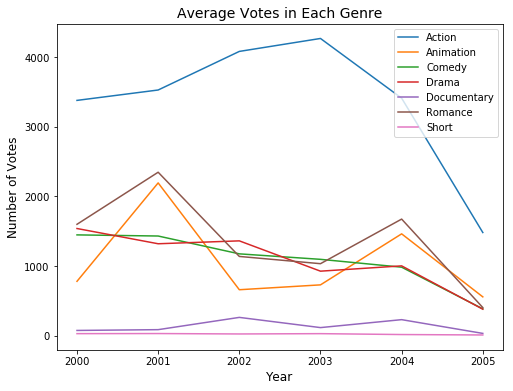

In [42]:
plt.figure(1,figsize=(8,6))
for g in genre:
    plt.plot(metric_pop[g],label = g)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.title('Average Votes in Each Genre', fontsize=14)
plt.legend(loc=1)

The figure above illustrates the average number of votes of movies in each genre. Interestingly, action movies are popular than any other kind of movies despite its lowest proportion of high-rating movies. Short movies have lowest score of popularity but largest proportion of high-rating movies.

In [256]:
pop = metric_pop.T
pop['overall'] = pop.mean(axis=1)
pop = pop.sort_values('overall', ascending= False)
pop

,2000,2001,2002,2003,2004,2005,overall
Action,3378.88,3528.1,4082.34,4268.29,3410.7,1481.07,3358.229577
Romance,1599.26,2347.18,1137.76,1033.57,1674.08,403.243,1365.847140
Drama,1538.73,1319.81,1361.48,926.123,1002.27,380.095,1088.084147
Comedy,1447.2,1430.94,1174.83,1096.1,983.29,384.659,1086.167468
Animation,780.315,2193.83,659.481,729.436,1462.14,557,1063.700731
Documentary,74.8171,86.1327,262.237,115.69,229.798,32.2286,133.483903
Short,28.8352,30.2714,24.2402,28.7532,15.9479,9.74074,22.964753


The table above represents the score of popularity of movies in each genre in most recent six years. We see that action movies have consistent highest scores over recent years. Also, the overall score of action movies is more than twice of the score of romance movies, which has the second highest score. 

### 2. score of reputation

The second metric was to evaluate the reputation of movies in differenct genres. We used weighted rating - sum of rating times votes of movies in each genre divided by total number of votes - to represent the score of reputation. By doing this, we eliminate the bias of reviews towards minimal-voted movies. For example, a movie was rated as ten star while only less than ten people have reviewed it. In such a case, ten might not be the true score of rating/reputation of this movies on the market as the majority audience are not interested in watching it. 

In [257]:
metric_rating = pd.DataFrame(index=xrange(2000,2006), columns=genre)
df['rating_votes'] =  df.rating * df.votes

for y in xrange(2000,2006):
    r = [] ; v = []
    for g in genre:
        r.append(df.loc[(df.year == y) & (df[g] == 1)]['rating_votes'].sum())
        v.append(df.loc[(df.year == y) & (df[g] == 1)]['votes'].sum())
    res = [m/n for m, n in zip(r, v)] #  get the weighted rating
    metric_rating.loc[y] = res

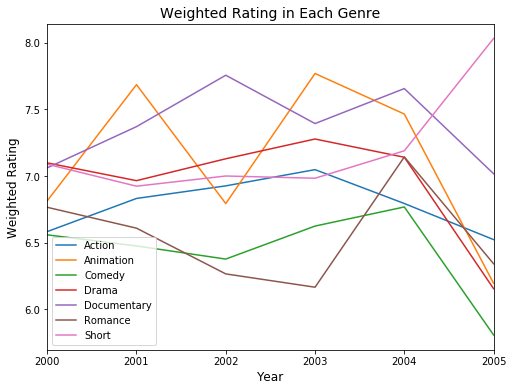

In [258]:
metric_rating.plot(figsize=(8,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Weighted Rating', fontsize=12)
plt.title('Weighted Rating in Each Genre', fontsize=14)

Based on the graph above, the score of reputation changed across years and genres. Note that the score of reputation of all movies was decreasing since 2004 except short movies. Also, action movies have the slowest decrease rate of such as score. The table belows shows that documentary movies have highest reputation while comedy movies have the lowest. Short and animation movies have relatively good scores of reputation, while drama, action and romance movies have scores of repuation below 7.

In [259]:
rating = metric_rating.T
rating['overall'] = rating.mean(axis=1)
rating = rating.sort_values('overall', ascending= False)
rating

,2000,2001,2002,2003,2004,2005,overall
Documentary,7.06167,7.3711,7.75735,7.39428,7.65705,7.01729,7.376456
Short,7.08919,6.9239,7.00039,6.98366,7.18981,8.03346,7.203402
Animation,6.81352,7.68644,6.79352,7.77031,7.46575,6.1947,7.120707
Drama,7.09896,6.96545,7.12985,7.27827,7.14131,6.15406,6.961315
Action,6.58284,6.83179,6.92632,7.04822,6.79379,6.52279,6.784290
Romance,6.76547,6.60867,6.26513,6.16514,7.14356,6.34115,6.548187
Comedy,6.55852,6.47513,6.37652,6.62437,6.76793,5.8064,6.434813


# Conclusion

Based on our analysis, we recommend to pick action movie as our next movie. The reasons are as follows:
* Action movies has overwhelmingly high score of popularity, meaning that it has the largest audiance among all movies.
* Action movies has relatively high score of reputation, especially that the rate of decrease in such as score is not as fast as other movies.

Note that our conclusion is not comprehensive due to the limitations of our data and methodology: 
* We were able to access data till 2005, which might not represent the current trend of movies.
* It is highly propable that our data in 2005 is incomplete, causing a sharp decrease in numbers of movie in that year. 
* Lacking of complete information of budget and any other information of the movie, our method focuses on evaluating movie popularity and reputation of historical data. This method would not be resonable if we have budget constrains.